<a href="https://colab.research.google.com/github/GunduSriBhanu/SriBhanu_DATA606/blob/main/src/Eda_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Exploratory Data Analysis

## Data Loading

In [2]:
df_heart = pd.read_csv("https://raw.githubusercontent.com/GunduSriBhanu/SriBhanu_DATA606/main/data/uci_heart_data.csv")
df_heart.shape

(900, 15)

In [3]:
df_heart.head()

,Unnamed: 0,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df_heart.tail()

,Unnamed: 0,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
895,895,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1.0,0.0,3.0,1
896,896,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,0.0,3.0,1
897,897,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,0.0,3.0,1
898,898,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,0.0,7.0,1
899,899,65.0,1.0,4.0,130.0,275.0,0.0,1.0,115.0,1.0,1.0,2.0,0.0,3.0,1


In [5]:
df_heart.describe()

,Unnamed: 0,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
count,900.000000,900.000000,900.000000,900.000000,899.000000,877.000000,900.000000,900.000000,899.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,52.278889,0.694444,3.101111,131.981090,247.977195,0.122222,0.737778,146.192436,0.318889,0.891444,1.507778,0.446667,4.242222,0.748889
std,259.951919,9.187274,0.460898,0.964209,17.593868,57.122890,0.327724,0.930341,23.601784,0.466305,1.104589,0.588115,0.826723,1.809994,1.078276
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,224.750000,45.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,130.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,449.500000,53.000000,1.000000,3.000000,130.000000,242.000000,0.000000,0.000000,150.000000,0.000000,0.500000,1.000000,0.000000,3.000000,0.000000
75%,674.250000,59.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,163.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,899.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#### Assigning datatypes based on the analysis of categories and numerical.
From my observation, these columns must be object data types( categorical features):

**Categorical datatypes are:**

sex

chest_pain_type

ekg_results 

exercise_angina

slope_of_st

thallium

heart_disease

**Numerical datatypes are:**

age 

resting blood pressure

cholestoral

fasting_blood_sugar

max_hr

ST_depression

vessels


In [6]:
categorical_columns = ['sex','chest_pain_type','ekg_results','fasting_blood_sugar','exercise_angina','slope_of_st','thallium','heart_disease']
numerical_columns = ['age','resting blood pressure','cholestoral','max_hr','ST_depression','vessels']

In [7]:
df_heart[numerical_columns] = df_heart[numerical_columns].apply(pd.to_numeric)
for i in categorical_columns:
  df_heart[i] = df_heart[i].astype(str)
print(df_heart.dtypes)

Unnamed: 0                  int64
age                       float64
sex                        object
chest_pain_type            object
resting blood pressure    float64
cholestoral               float64
fasting_blood_sugar        object
ekg_results                object
max_hr                    float64
exercise_angina            object
ST_depression             float64
slope_of_st                object
vessels                   float64
thallium                   object
heart_disease              object
dtype: object


In [8]:
# 'sex','chest_pain_type','ekg_results','exercise_angina','slope_of_st','thallium','heart_disease','vessels'
df_heart['sex'] = df_heart['sex'].replace({'0':'Female', '1':'Male','0.0':'Female', '1.0':'Male'})
df_heart['chest_pain_type'] = df_heart['chest_pain_type'].replace({'1':'Typical_Angina','2':'Atypical_Angina','3':'Non_Anginal','4':'Asymptomatic_Bp','1.0':'Typical_Angina','2.0':'Atypical_Angina','3.0':'Non_Anginal','4.0':'Asymptomatic_Bp'})
df_heart['exercise_angina'] = df_heart['exercise_angina'].replace({'0':'Yes', '1':'No', '0.0':'Yes', '1.0':'No'})
df_heart['fasting_blood_sugar'] = df_heart['fasting_blood_sugar'].replace({'0':'Present', '1':'Absent', '0.0':'Present', '1.0':'Absent'})
df_heart['ekg_results'] = df_heart['ekg_results'].replace({'0.0':'Normal', '1.0' : 'Abnormal', '2.0':'Probable','0':'Normal', '1' : 'Abnormal', '2':'Probable'})
df_heart['slope_of_st'] = df_heart['slope_of_st'].replace({'1.0' : 'Upsloping', '2.0' :'Flat', '3.0' : 'Downsloping','1' : 'Upsloping', '2' :'Flat', '3' : 'Downsloping'})
df_heart['thallium'] = df_heart['thallium'].replace({'3.0':'Normal','6.0' :'Fixed_Defect', '7.0' : 'Reversable_Defect','3':'Normal','6' :'Fixed_Defect', '7' : 'Reversable_Defect'})
df_heart['heart_disease'] = df_heart['heart_disease'].replace({'0':'Absence', '1' : 'Presence', '2' : 'Presence', '3' : 'Presence', '4' : 'Presence'})

In [9]:
df_heart.head()

,Unnamed: 0,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
0,0,63.0,Male,Typical_Angina,145.0,233.0,Absent,Probable,150.0,Yes,2.3,Downsloping,0.0,Fixed_Defect,Absence
1,1,67.0,Male,Asymptomatic_Bp,160.0,286.0,Present,Probable,108.0,No,1.5,Flat,3.0,Normal,Presence
2,2,67.0,Male,Asymptomatic_Bp,120.0,229.0,Present,Probable,129.0,No,2.6,Flat,2.0,Reversable_Defect,Presence
3,3,37.0,Male,Non_Anginal,130.0,250.0,Present,Normal,187.0,Yes,3.5,Downsloping,0.0,Normal,Absence
4,4,41.0,Female,Atypical_Angina,130.0,204.0,Present,Probable,172.0,Yes,1.4,Upsloping,0.0,Normal,Absence


In [10]:
df_heart.tail()

,Unnamed: 0,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
895,895,52.0,Male,Asymptomatic_Bp,160.0,331.0,Present,Normal,94.0,No,2.5,Upsloping,0.0,Normal,Presence
896,896,54.0,Female,Non_Anginal,130.0,294.0,Present,Abnormal,100.0,No,0.0,Flat,0.0,Normal,Presence
897,897,56.0,Male,Asymptomatic_Bp,155.0,342.0,Absent,Normal,150.0,No,3.0,Flat,0.0,Normal,Presence
898,898,58.0,Female,Atypical_Angina,180.0,393.0,Present,Normal,110.0,No,1.0,Flat,0.0,Reversable_Defect,Presence
899,899,65.0,Male,Asymptomatic_Bp,130.0,275.0,Present,Abnormal,115.0,No,1.0,Flat,0.0,Normal,Presence


### Checking Outliers

In [11]:
numerical_columns = list(df_heart.loc[:,['age','resting blood pressure','cholestoral','max_hr','ST_depression','vessels']])
categorical_columns = list(df_heart.loc[:,['sex','chest_pain_type','ekg_results','fasting_blood_sugar','exercise_angina','slope_of_st','thallium','heart_disease']])

From the data, ST_depression and vessels are highly skewed.

## Duplicated values

In [12]:
df_heart.duplicated().sum()

0

In [13]:
df_heart[df_heart.duplicated()]

,Unnamed: 0,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease


### Note:
Missing values imputation is done in Feature processing

In [14]:
def Missing_values(df):
    #Finding null values from the dataframe
    null_values = df.isnull().sum().sort_values(ascending=False)
    #Finding null values percentage from the dataframe
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    #concating across columns
    null_values = pd.concat([null_values, null_percent], axis=1, keys=['Missing_values', '% Missing_values'])
    return null_values

Missing_values(df_heart)


,Missing_values,% Missing_values
cholestoral,23,0.025556
resting blood pressure,1,0.001111
max_hr,1,0.001111
Unnamed: 0,0,0.000000
age,0,0.000000
sex,0,0.000000
chest_pain_type,0,0.000000
fasting_blood_sugar,0,0.000000
ekg_results,0,0.000000
exercise_angina,0,0.000000


## Statastical distribution

In [15]:
#check data description
df_heart.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900.000000,449.500000,259.951919,0.000000,224.750000,449.500000,674.250000,899.000000
age,900.000000,52.278889,9.187274,28.000000,45.000000,53.000000,59.000000,77.000000
resting blood pressure,899.000000,131.981090,17.593868,92.000000,120.000000,130.000000,140.000000,200.000000
cholestoral,877.000000,247.977195,57.122890,85.000000,211.000000,242.000000,277.000000,603.000000
max_hr,899.000000,146.192436,23.601784,71.000000,130.000000,150.000000,163.000000,202.000000
ST_depression,900.000000,0.891444,1.104589,0.000000,0.000000,0.500000,1.500000,6.200000
vessels,900.000000,0.446667,0.826723,0.000000,0.000000,0.000000,1.000000,3.000000


In [16]:
df_heart.corr()

,Unnamed: 0,age,resting blood pressure,cholestoral,max_hr,ST_depression,vessels
Unnamed: 0,1.000000,-0.220363,0.037946,0.036530,-0.244041,-0.137872,-0.296394
age,-0.220363,1.000000,0.248505,0.145268,-0.309327,0.247188,0.400089
resting blood pressure,0.037946,0.248505,1.000000,0.112902,-0.094759,0.184449,0.065173
cholestoral,0.036530,0.145268,0.112902,1.000000,-0.055044,0.057610,0.074236
max_hr,-0.244041,-0.309327,-0.094759,-0.055044,1.000000,-0.275392,-0.117370
ST_depression,-0.137872,0.247188,0.184449,0.057610,-0.275392,1.000000,0.312854
vessels,-0.296394,0.400089,0.065173,0.074236,-0.117370,0.312854,1.000000


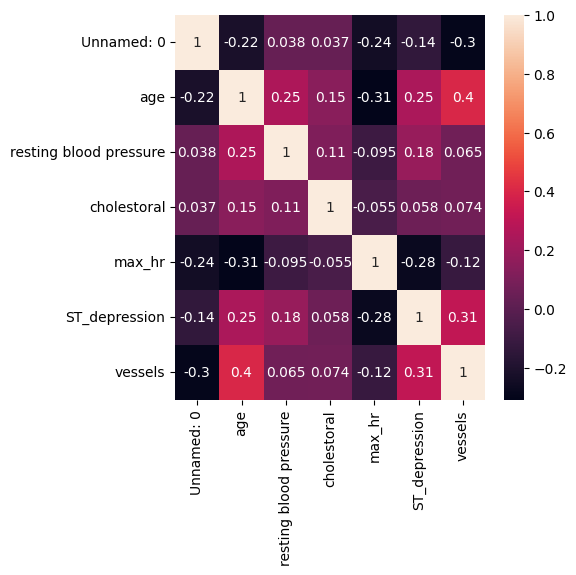

In [17]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.heatmap(df_heart.corr(),annot=True)
plt.show()

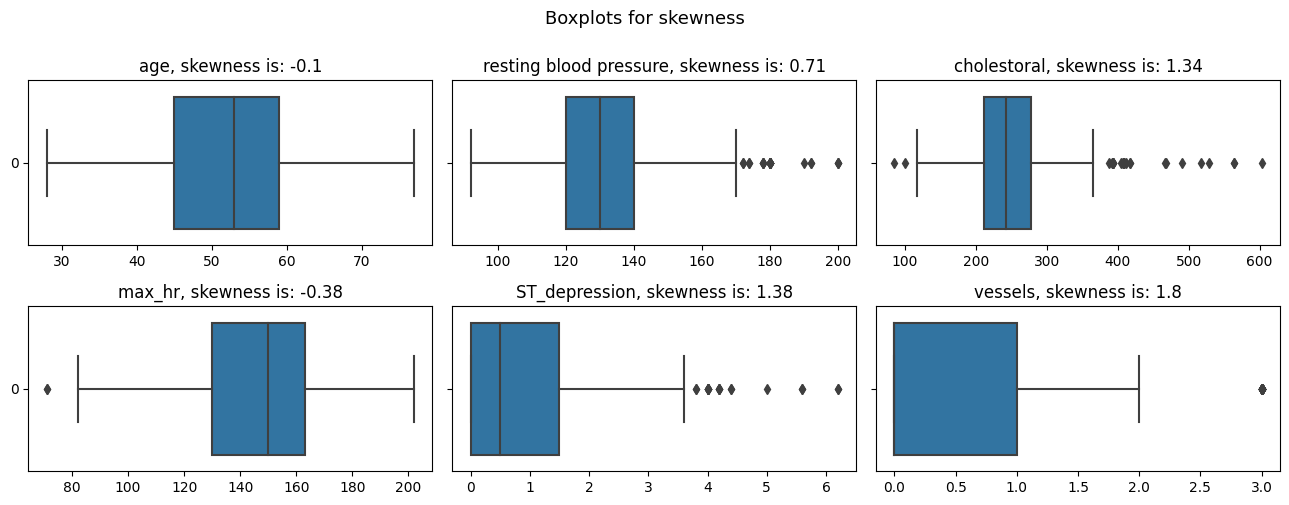

In [18]:
import plotly.express as px
from matplotlib import pyplot as plt
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=13)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df_heart, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for skewness')
plt.tight_layout()


In [19]:
# define continuous variable & plot
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_eda.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
        

outliers(df_heart[numerical_columns])

For the feature age, No of Outliers is 0
For the feature resting blood pressure, No of Outliers is 900
For the feature cholestoral, No of Outliers is 900
For the feature max_hr, No of Outliers is 900
For the feature ST_depression, No of Outliers is 20
For the feature vessels, No of Outliers is 40


In [20]:
df_eda = df_heart.fillna(df_heart.mean())
df_eda.isnull().sum()

<ipython-input-20-100a296b229a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_eda = df_heart.fillna(df_heart.mean())


Unnamed: 0                0
age                       0
sex                       0
chest_pain_type           0
resting blood pressure    0
cholestoral               0
fasting_blood_sugar       0
ekg_results               0
max_hr                    0
exercise_angina           0
ST_depression             0
slope_of_st               0
vessels                   0
thallium                  0
heart_disease             0
dtype: int64

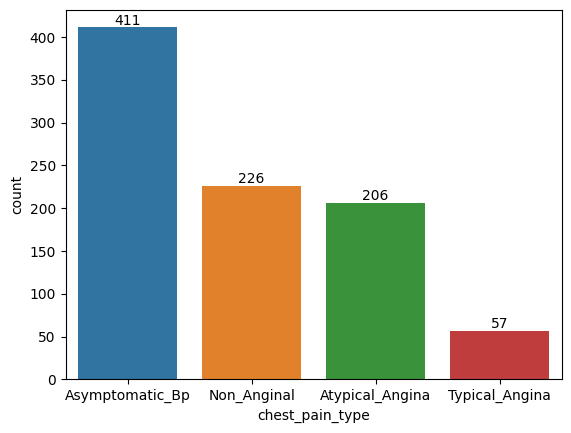

In [21]:
import seaborn as sns
ax=sns.countplot(data=df_eda, x='chest_pain_type',order = df_eda['chest_pain_type'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()


In [22]:
df_vis = df_eda.dropna()

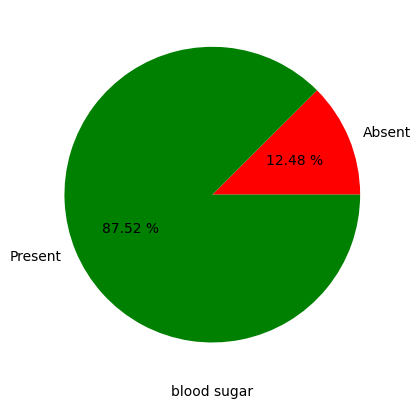

In [23]:
gb_sales2=df_vis.groupby(by="fasting_blood_sugar")[["cholestoral"]].sum()
res_2=gb_sales2.reset_index()
plt.pie(x="cholestoral",labels="fasting_blood_sugar", data=res_2, autopct="%.2f %%",colors=["r","g","b"])
plt.xlabel("blood sugar")
plt.show()

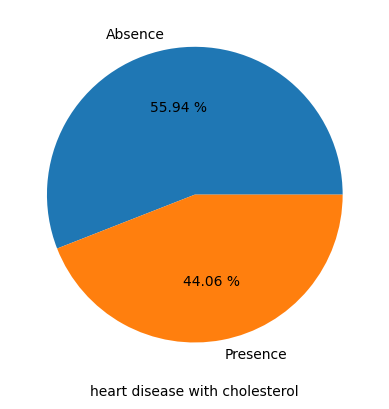

In [24]:
gb_sales2=df_vis.groupby(by="heart_disease")[["cholestoral"]].sum()
res_2=gb_sales2.reset_index()
plt.pie(x="cholestoral",labels="heart_disease", data=res_2, autopct="%.2f %%")
plt.xlabel("heart disease with cholesterol")
plt.show()

<Figure size 1000x800 with 0 Axes>

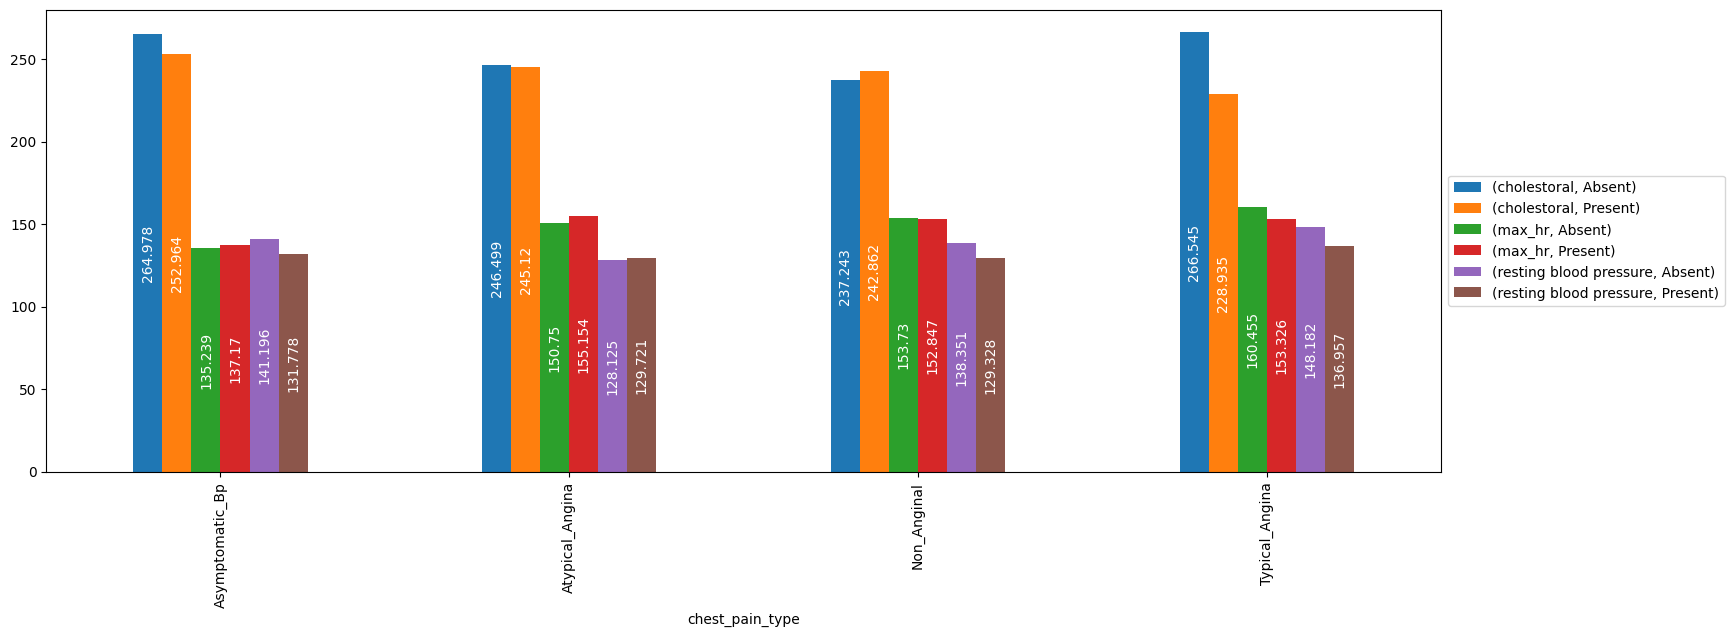

In [25]:
df_disease=df_eda.pivot_table(index="chest_pain_type", columns="fasting_blood_sugar", values=["resting blood pressure","cholestoral","max_hr"])
plt.figure(figsize=(10,8))
ax = df_disease.plot.bar(figsize=(18,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, color='white')
plt.show()

<Figure size 1000x800 with 0 Axes>

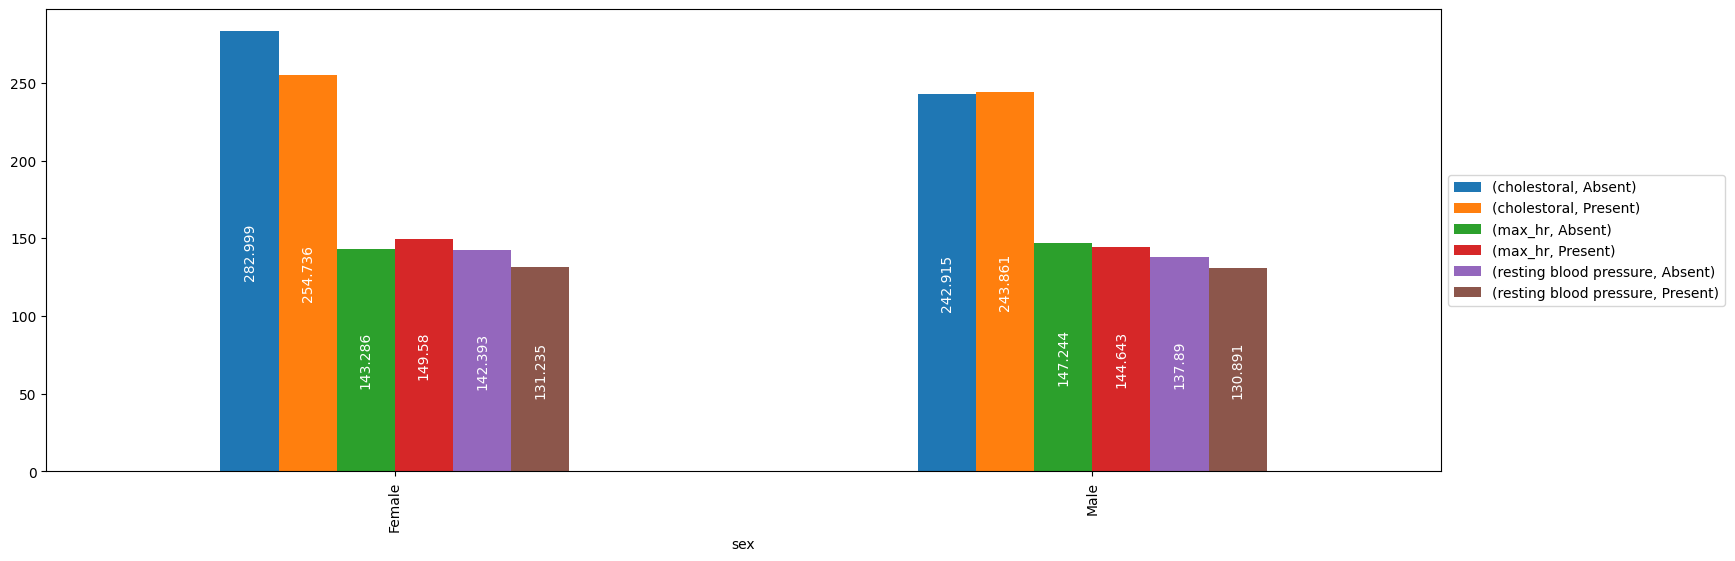

In [26]:
df_disease=df_eda.pivot_table(index="sex", columns="fasting_blood_sugar", values=["resting blood pressure","cholestoral","max_hr"])
plt.figure(figsize=(10,8))
ax = df_disease.plot.bar(figsize=(18,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, color='white')
plt.show()

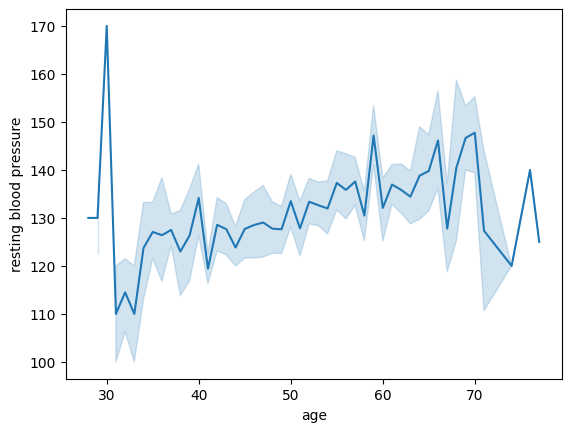

In [27]:
sns.lineplot(y = "resting blood pressure", x = "age", data = df_eda)
#sns.lineplot(x = "cholestoral", y = "age", data = df_eda)
plt.show()

<Axes: xlabel='age', ylabel='cholestoral'>

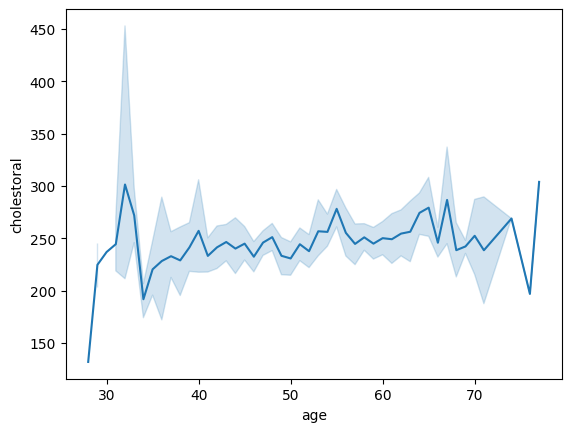

In [28]:
sns.lineplot(y = "cholestoral", x = "age", data = df_eda)

## Data Visualization